Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 12, 12, 16)        4624      
 anspose)                                                        
                                                                 
 up_sampling2d (UpSampling2  (None, 24, 24, 16)        0

/usr3/graduate/smkelley/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step


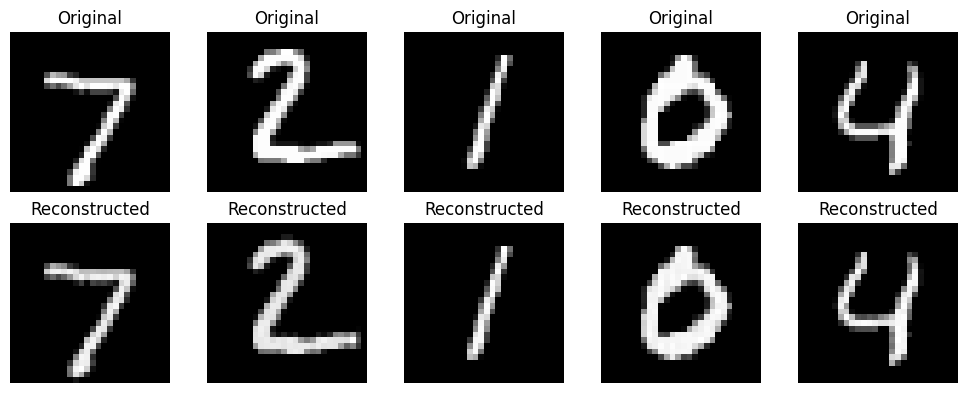

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
BATCH_SIZE = 128
NUM_EPOCHS = 100
SAVE_PATH = "./CAE_MNIST_model.h5"

# Loading the dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to have a single channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Model Definition
model = models.Sequential()

# Encoder
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Decoder
model.add(layers.Conv2DTranspose(16, (3, 3), activation='relu'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2DTranspose(1, (3, 3), activation='relu'))
model.add(layers.Conv2DTranspose(1, (3, 3), activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Training loop
history = model.fit(
    x_train, x_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(x_test, x_test),
    verbose=2
)

# Save the model
model.save(SAVE_PATH)

# Plotting original and reconstructed images
decoded_images = model.predict(x_test)

plt.figure(figsize=(10, 4))
for i in range(5):
    # Original images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()
